# CS3300 - Final Project
### By: Neel Desai and Tyler Faulkner
### Due: February 21, 2021

## Hypothesis

Some of the questions we are aiming to answer with this notebook are:

Do any variables correalate to if the student gets placed or not?

How well does a predictive classification model perform using correlated variables?

How does that model compare to models using other selections of variables?

If variables in the data set show correlation to the student's placement after college, then a relatively accurate predictive model can be trained to predict a student's placement post-college.


## Data Set

The data set we will be analyzing is the College Recruitment data which can be found at the link below on Kaggle:

https://www.kaggle.com/benroshan/factors-affecting-campus-placement

The data set was created to analyze what academic and employability factors influence whether a student gets placed into a career. The dataset was created from data from the information about MBA students during the January 2022 term from CMS Business School located in India. The original data can be found below:

https://github.com/DG1606/CMS-R-2020

The dataset includes 15 columns in total. The serial number column will not be used since it only serves as a unique identifier for each entry. The salary column will also not be used since it only applies to students who got placed into a career and does not apply to actually placing in a career in itself.

There are 8 categorical variables in the data and 5 numerical variables we will be using in total. The placed variable will be our target variable to see if we can predict.


### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

## Data Preprocessing

The data set contains 215 unique entries. The only column that is missing values is the Salary column since only students who are placed in a career have a salary. Again, we will not be using the salary column so there is no need for imputation since we are dropping the column.

In [2]:
datapath = "Placement_Data_Full_Class.csv"

raw_data = pd.read_csv(datapath)

print(raw_data.info())

raw_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB
None


,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


We will be dropping the serial number and salary column since salary only applies to placed students and the serial number is simply a unique indentifier that has no correlation to the status.

In [3]:
clean_data = raw_data.drop(['sl_no', 'salary'], axis=1)

clean_data.head()

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed


The last part of our preprocessing is to convert the object columns into categories.

In [4]:
clean_data = clean_data.astype({'gender':'category',
                               'ssc_b':'category',
                               'hsc_b':'category',
                               'hsc_s':'category',
                               'degree_t':'category',
                               'workex':'category',
                               'specialisation':'category',
                               'status':'category'})
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   gender          215 non-null    category
 1   ssc_p           215 non-null    float64 
 2   ssc_b           215 non-null    category
 3   hsc_p           215 non-null    float64 
 4   hsc_b           215 non-null    category
 5   hsc_s           215 non-null    category
 6   degree_p        215 non-null    float64 
 7   degree_t        215 non-null    category
 8   workex          215 non-null    category
 9   etest_p         215 non-null    float64 
 10  specialisation  215 non-null    category
 11  mba_p           215 non-null    float64 
 12  status          215 non-null    category
dtypes: category(8), float64(5)
memory usage: 11.2 KB


## Data Analysis and Visualization

### Variable Characterization

Before we perform and analysis for each variable compared against the placement target variable. We we characterize each variable individually to determine their centralities and distributions.

#### Numerical Variables

For the numerical (continuous) variables we will use a histogram.

Below is the function we will use to output each numerical variable plot:

In [5]:
def plotHistogram(col_name, xlabel, color):
    clean_data[col_name].plot.hist(color=color)
    plt.xlabel(xlabel)
    plt.show()

##### 10th Grade Secondary Education Percentage

For the students 10th grade percentage outcome, the values ranged from a little over 40% to a little under 90%. A majority of the student were in the range of 60 to 80 percentage.

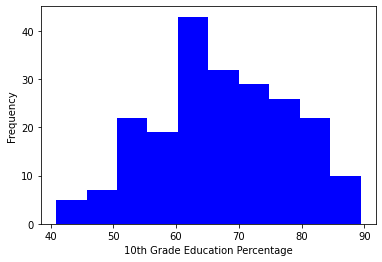

In [6]:
plotHistogram('ssc_p', '10th Grade Education Percentage', 'blue')

##### 12th Grade Higher Secondary Education percentage

For the students 12th grade percentage results, the found values had a range of around 35% to around 97%. Most of the students were found to be in the range of 50% to 80%.

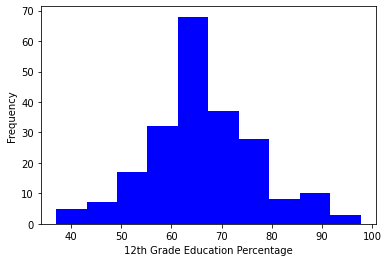

In [8]:
plotHistogram('hsc_p', '12th Grade Education Percentage', 'red')

##### Degree Percentage

The results found for the percentage for the students who graduated were between 50% to 94%. The majority of students were found to be in the range of 55% to 75%.

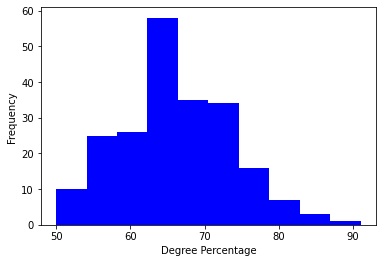

In [10]:
plotHistogram('degree_p', 'Degree Percentage', 'green')

##### Employability Test Percentage

After analyzing the data we discovered that the employability test percentage for college students was between 50% and 98% with no clear cut range for a majority of values.  

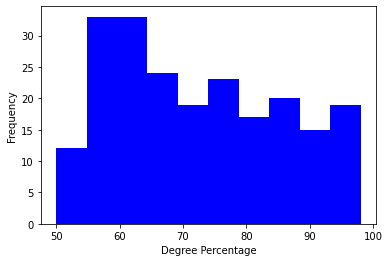

In [11]:
plotHistogram('etest_p', 'Employability Test Percentage', 'yellow')

##### MBA Percentage

For students that took the MBA exam, the exam scores were between 52% and 78%. Most of the students lied in the 57% to 67% range.

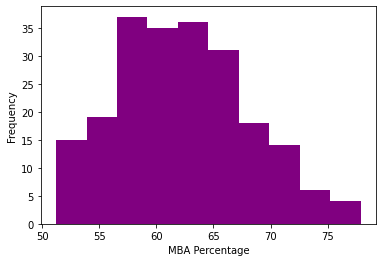

In [13]:
plotHistogram('mba_p', 'MBA Percentage', 'purple')

#### Categorical Variables

For the categorical variables we will be analyzing using count plots.

Below is the method we will be using to plot each variable:

In [15]:
def plotCount(col_name, xlabel):
    sns.countplot(x=col_name, data=clean_data)
    plt.xlabel(xlabel)
    plt.show()

##### Gender

A majority around 65% were male compared to 35% female.

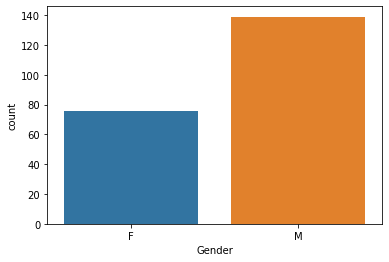

In [16]:
plotCount('gender', 'Gender')

##### Secondary Board of Education

Most students were apart of the Central secondary board of education. We will note that the data set information did not disclose how many boards encompass the 'other' category

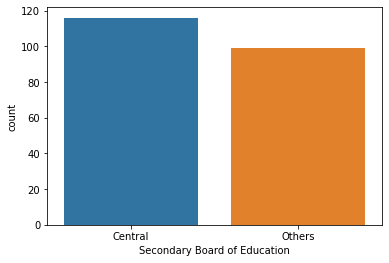

In [17]:
plotCount('ssc_b', 'Secondary Board of Education')

##### Higher Board of Education

Most students were not in the central board of education for their higher secondary schooling. It is interesting to notice the contrast between secondary and higher secondary boards of education. 

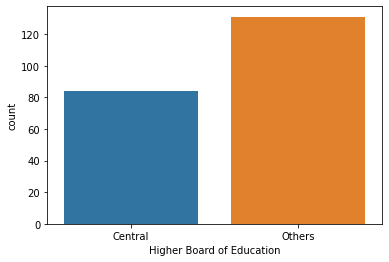

In [18]:
plotCount('hsc_b', 'Higher Board of Education')

##### Specialization in Higher Secondary Education

A majority of students either specialized in commerce or science while a minuscule amount of students specialized in the Arts.

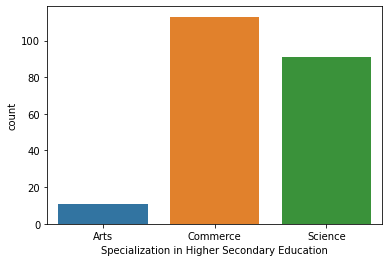

In [19]:
plotCount('hsc_s', 'Specialization in Higher Secondary Education')

##### Undergraduate Degree Type

A wide majority of students obtained a Commerce and Managament degree. A smaller portion obtained a Science and Tech type degree while the smallest portion took some other type of degree.

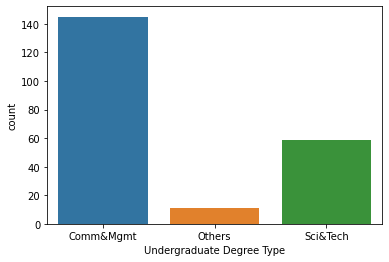

In [20]:
plotCount('degree_t', 'Undergraduate Degree Type')

##### Work Experience

Interestingly, most of the students did not have work experience prior to their placement in a career.

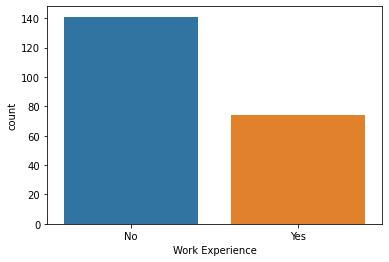

In [21]:
plotCount('workex', 'Work Experience')

##### Graduate Specialisation

Both the Marketing and finance degree along with the Marketing and Human Resources degree had similar counts; however, Marketing and Finance had slightly more overall.

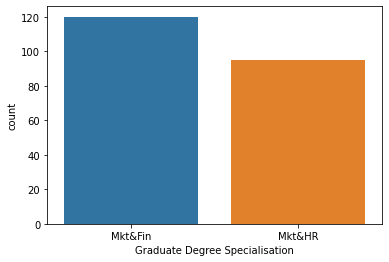

In [22]:
plotCount('specialisation', 'Graduate Degree Specialisation')

#### Placement Status

This is our target variable.

A little over two thirds of the student were placed into a career after recieving their Graduate degree while the others did not.

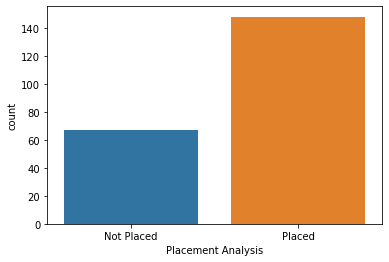

In [23]:
plotCount('status', 'Placement Analysis')

### Variable Analysis

For our data analysis, we will create a graphical visualization of the variable, information of the centrality and distribution, along with a statstical test to determine signifigance of the variable.

#### Numerical Variables

For the numerical variables compared against our categorical target variable we will be using a box plot and the Kruskall-Wallis test.

Below is the function we will be using to create samples for each feature for the kruskall-wallis test:

In [31]:
def sample_by_feature(feature):
    samples_by_group = []
    for value in set(clean_data['status']):
        mask = clean_data['status'] == value
        samples_by_group.append(clean_data[feature][mask])
    return samples_by_group

Below is the function we will be using for each variable:

In [25]:
def printNumericalInfo(col_name, var_name):
    sns.boxplot(x=col_name, y='status', data=clean_data)
    plt.title('Placement Status vs. ' + var_name)
    plt.ylabel("Placement Status")
    plt.xlabel(var_name)
    plt.show()
    stat, p = stats.kruskal(*sample_by_feature(col_name))
    print("Kruskal-Walis Test P-Value for " + var_name + " on Placement: " + str(p))

##### 10th Grade Secondary Education Percentage

Based on the plot, it appears that students placed into a career had slighlty higher 10th grade percentages on average.

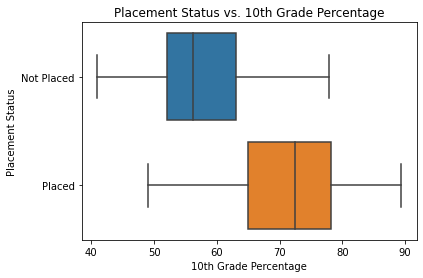

Kruskal-Walis Test P-Value for 10th Grade Percentage on Placement: 1.6751463798396454e-18


In [32]:
printNumericalInfo('ssc_p', '10th Grade Percentage')

##### 12th Grade Higer Secondary Education Percentage

Looking at the box plot, the students who had a higher 12th grade percentage were more frequently placed into jobs.

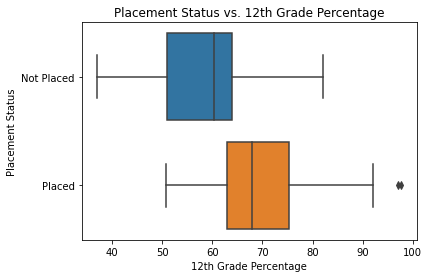

Kruskal-Walis Test P-Value for 12th Grade Percentage on Placement: 1.1865333364186911e-11


In [33]:
printNumericalInfo('hsc_p', '12th Grade Percentage')

##### Degree Percentage

The box plot below shows us that on average, students who had a higher degree percentage were more likely to be put into a career. 

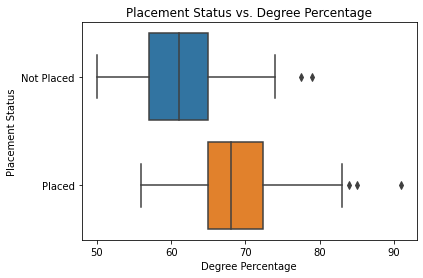

Kruskal-Walis Test P-Value for Degree Percentage on Placement: 4.2650477536563365e-13


In [34]:
printNumericalInfo('degree_p', 'Degree Percentage')

##### Employability Test Percentage

It is interesting to see that the employability test percentage for students did not have a much larger role on if a student secured a job or not. 

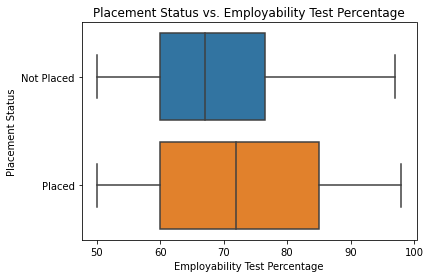

Kruskal-Walis Test P-Value for Employability Test Percentage on Placement: 0.09531059978063809


In [37]:
printNumericalInfo('etest_p', 'Employability Test Percentage')

##### MBA Percentage

The graphs for MBA percentages show that there was not much correlation between a students MBA score and if they got placed or not.

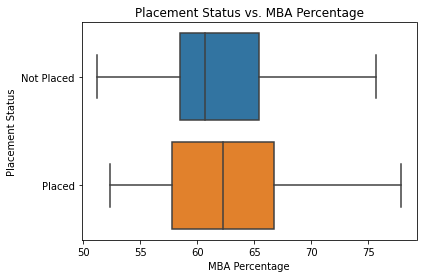

Kruskal-Walis Test P-Value for MBA Percentage on Placement: 0.35409377071336057


In [36]:
printNumericalInfo('mba_p', 'MBA Percentage')

#### Categorical Variables

For the we will be using a heat map to visual the data and the Chi-squared test to see stastistical signifigance.

Below is the method we will use to get the p-value from the Chi-squared test:

In [41]:
def chi2_pval(col):
    combination_counts = clean_data[["status", col]].groupby(by=["status", col]).size().unstack(level=0).fillna(0)
    chi2, p, _, _ = stats.chi2_contingency(combination_counts)
    return p

Below is the method we will use to display the categorical variable information:

In [39]:
def displayCatInfo(col_name, var_name, cmap):
    counts = clean_data.groupby(['status', col_name]).size().unstack()
    sns.heatmap(counts, cmap=cmap)
    plt.title('Placement Status vs. ' + var_name)
    plt.xlabel(var_name)
    plt.show()
    print("Chi2 test of independance of " + var_name + " on Placement: " + str(chi2_pval(col_name)))

##### Gender

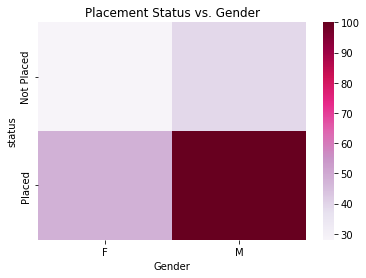

Chi2 test of independance of Gender on Placement: 0.23980260881037566


In [42]:
displayCatInfo('gender', 'Gender', 'PuRd')

## Data Modeling and Prediction

## Results Analysis